In [1]:
import pickle as pkl
import pandas as pd
import seaborn as sns

scores = pkl.load(open('/data/MIMIC/encounter_scores_mlp_svm_lr_rf.p','rb'))

scores_df = []
for key, value in scores.iteritems():
    print(key, value)
    for i in range(5):
        for method in ['rf', 'lr', 'svm', 'mlp']:
            d = {
                'Encounters': key,
                'Method': method,
                'Score': value[method][i]
            }
            scores_df.append(d)



(1, {'mlp': [0.54416107743459141, 0.5169195989971056, 0.50207918114344807, 0.50105298505366436, 0.49994509717799496], 'svm': [0.50752947213691357, 0.5, 0.50061018498613519, 0.5, 0.5], 'lr': [0.50528071125808216, 0.5, 0.49994509717799496, 0.5, 0.49994509717799496], 'rf': [0.7003064049704476, 0.66589665157452393, 0.66558912344677235, 0.68479268439048924, 0.56741232359808413]})
(3, {'mlp': [0.50897868540989311, 0.50790338992273487, 0.50307681285565853, 0.50038759689922485, 0.50471261990308158], 'svm': [0.51171495612007356, 0.50019372336303758, 0.50396463892385879, 0.50041668688282204, 0.5], 'lr': [0.51253449932944539, 0.5, 0.50033254390407012, 0.5, 0.5], 'rf': [0.73341659304101092, 0.64545614587635136, 0.64476742496660422, 0.65263403736626491, 0.64360294874970536]})
(5, {'mlp': [0.60849942057420825, 0.50296700721164844, 0.53446450731449813, 0.50360473202741229, 0.50621138182316516], 'svm': [0.51927242210191482, 0.50038744672607516, 0.50732847377770174, 0.5, 0.5], 'lr': [0.5142583756158806

In [2]:
import json

lstm_scores = json.load(open('/data/MIMIC/scores.json', 'r'))
print(lstm_scores)

for key, value in lstm_scores.iteritems():
    print(key)
    print(value)
    for i in range(5):
        d = {
            'Encounters': int(key),
            'Method': 'LSTM',
            'Score': value[i]
        }
        scores_df.append(d)

{u'10': [0.6398243632985037, 0.6943419168219481, 0.6438029072501378, 0.6713943231333254, 0.6342134638743688], u'20': [0.7059532786982539, 0.7026320225676337, 0.6674330163236024, 0.6962961577387868, 0.6705893668981098], u'30': [0.7311778814419826, 0.6896532728314587, 0.7167444230453669, 0.6844162723452357, 0.7235472840978444], u'50': [0.7009766916355029, 0.7581249777974349, 0.7213486519793711, 0.8029031718509402, 0.7882059204819872], u'1': [0.6429717776521221, 0.6266316895344758, 0.6579864337913448, 0.5323758025813691, 0.6657389068635338], u'3': [0.5998305398127994, 0.5865382071099516, 0.6460311900783346, 0.6978725496955659, 0.5322284587288252], u'5': [0.651599208378311, 0.613795193201563, 0.5952445906893578, 0.625660804407207, 0.6717564476767595]}
10
[0.6398243632985037, 0.6943419168219481, 0.6438029072501378, 0.6713943231333254, 0.6342134638743688]
20
[0.7059532786982539, 0.7026320225676337, 0.6674330163236024, 0.6962961577387868, 0.6705893668981098]
30
[0.7311778814419826, 0.68965327

In [11]:
scores_df = pd.DataFrame(scores_df, 
                         columns=['Encounters', 'Method', 'Score'])
print(scores_df)
scores_df.replace('rf', 'Random Forest', inplace=True)
scores_df.replace('lr', 'Logistic Regression', inplace=True)
scores_df.replace('svm', 'Support Vector Machine', inplace=True)
scores_df.replace('mlp', 'Feed-forward Neural Network', inplace=True)

     Encounters                  Method     Score
0             1           Random Forest  0.700306
1             1     Logistic Regression  0.505281
2             1  Support Vector Machine  0.507529
3             1                     mlp  0.544161
4             1           Random Forest  0.665897
5             1     Logistic Regression  0.500000
6             1  Support Vector Machine  0.500000
7             1                     mlp  0.516920
8             1           Random Forest  0.665589
9             1     Logistic Regression  0.499945
10            1  Support Vector Machine  0.500610
11            1                     mlp  0.502079
12            1           Random Forest  0.684793
13            1     Logistic Regression  0.500000
14            1  Support Vector Machine  0.500000
15            1                     mlp  0.501053
16            1           Random Forest  0.567412
17            1     Logistic Regression  0.499945
18            1  Support Vector Machine  0.500000


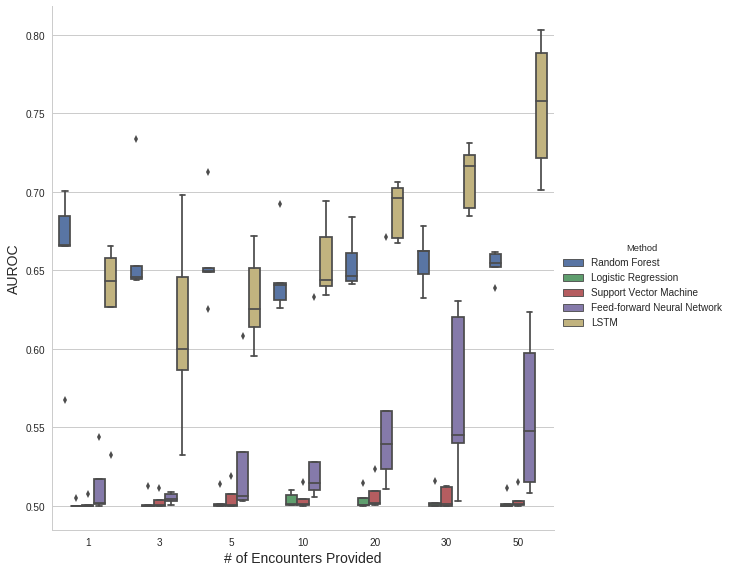

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.factorplot(x="Encounters", hue="Method", y="Score", data=scores_df,
               kind="box", size=8)
plt.ylabel('AUROC', fontsize=14)
plt.xlabel('# of Encounters Provided', fontsize=14)